In [2]:
# Michael Spearing
# February 15, 2017
# Data Science Lab 5

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.linear_model as skl_lm
import sklearn as skl
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Chapter 3 Question 10
carseats = pd.read_csv('input/Carseats.csv')
carseats.info()


In [ ]:
# A) Fit a multiple regression model to predict Sales using Price, Urban, and US
est = smf.ols('Sales ~ Price + Urban + US', carseats).fit()
est.summary()
carseats.corr()
regr = skl_lm.LinearRegression()

x = carseats[['Price', 'Urban', 'US']].as_matrix()
x[x=='Yes'] = 1
x[x=='No'] = 0
y = carseats.Sales
regr.fit(x,y)
print(regr.coef_)
print(regr.intercept_)


In [67]:
# Chapter 4 Question 10
weekly = pd.read_csv('./input/weekly.csv')
weekly = weekly.iloc[:,1:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
Year         1089 non-null int64
Lag1         1089 non-null float64
Lag2         1089 non-null float64
Lag3         1089 non-null float64
Lag4         1089 non-null float64
Lag5         1089 non-null float64
Volume       1089 non-null float64
Today        1089 non-null float64
Direction    1089 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 76.6+ KB
            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519  0.841942   
Lag1   -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183 -0.064951   
Lag2   -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499 -0.085513   
Lag3   -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657 -0.069288   
Lag4   -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675 -0.061075   
Lag5   -0.030519 -0.008183 -0.072499  0

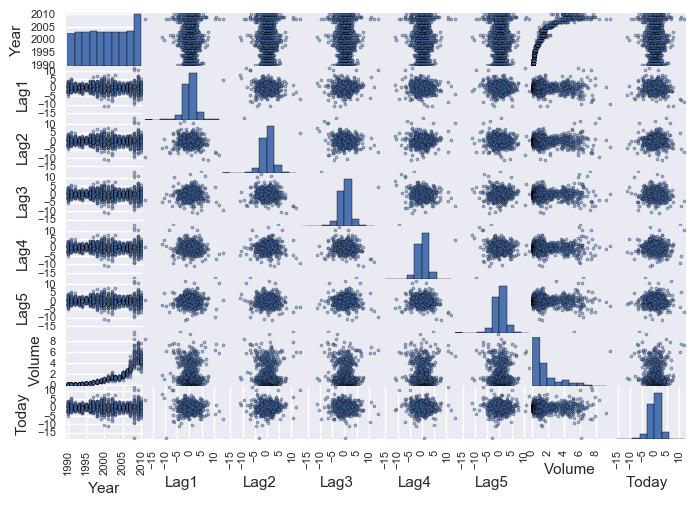

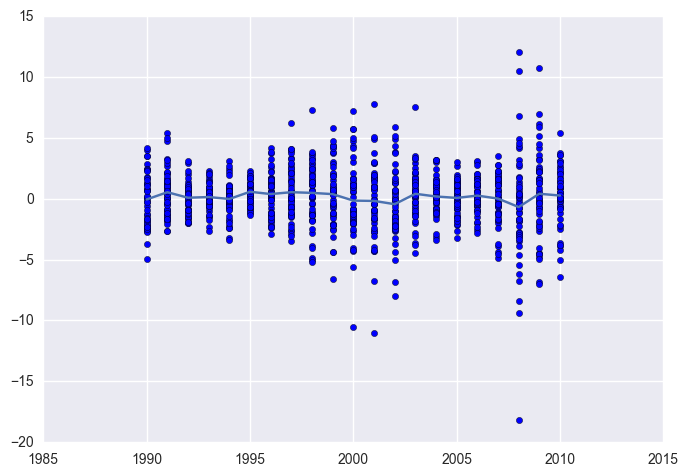

In [71]:
# A) Produce some numerical and graphical summaries of the Weekly 
# data. Do there appear to be any patterns?
weekly.info()
weekly.head()
print(weekly.corr())
scatter_matrix(weekly)
plt.show()
year_avg = [None] *(21)
for i in range(21):
    year_avg[i] = weekly[weekly['Year'] == (i + 1990)]
    year_avg[i] = year_avg[i]['Today']
    year_avg[i] = year_avg[i].mean()
plt.plot(range(1990 , 2011),year_avg)
plt.scatter(weekly['Year'],weekly['Today'])
plt.show()

In [87]:
# B) Use the full data set to perform a logistic regression with 
# Direction as the response and the five lag variables plus Volume 
# as predictors. Use the summary function to print the results. Do 
# any of the predictors appear to be statistically significant? If so, 
# which ones?
model_LR = skl_lm.LogisticRegression()
model_LR = model_LR.fit(weekly.iloc[:,1:7], weekly['Direction'])
predicted_LR = model_LR.predict(weekly.iloc[:,1:7])
wrong = 0
for i in range(len(predicted_LR)):
    if(predicted_LR[i] != weekly.iloc[i,8]):
        wrong += 1
best = skl.feature_selection.SelectKBest(k='all')
best = best.fit(weekly.iloc[:,1:7], weekly['Direction'])
print "P-Values for Features Lag1 - Lag5 and Volume:"
print best.pvalues_
print("\nNumber of miss classifications: " + str(wrong))
print("\nCoeficients of predictors: \n" + str(model_LR.coef_))


P-Values for Features Lag1 - Lag5 and Volume:
[ 0.09909393  0.01642199  0.45003688  0.49813649  0.54923033  0.55304206]

Number of miss classifications: 476

Coeficients of predictors: 
[[-0.04117292  0.05846974 -0.01599122 -0.02769998 -0.01440289 -0.02212844]]


In [89]:
# C) Compute the confusion matrix and overall fraction of correct 
# predictions. Explain what the confusion matrix is telling you about 
# the types of mistakes made by logistic regression.
cm_LR = confusion_matrix(weekly['Direction'],predicted_LR, labels=['Up','Down'] )
print("Confusion Matrix: ")
print(cm_LR)
print("Fraction of Correct Predictions: " + str(cm_LR[0,0] + cm_LR[1,1]) + "/" + str(cm_LR.sum()))
print("Percent of Correct Predictions: " + str(((cm_LR[0,0] + cm_LR[1,1]) / float(cm_LR.sum()))*100))

Confusion Matrix: 
[[558  47]
 [429  55]]
Fraction of Correct Predictions: 613/1089
Percent of Correct Predictions: 56.290174472


In [92]:
# D) Now fit the logistic regression model using a training data period 
# from 1990 to 2008, with Lag2 as the only predictor. Compute the 
# confusion matrix and the overall fraction of correct predictions for 
# the held out data (that is, the data from 2009 and 2010).
trainingData = weekly[weekly.Year < 2009]
X_td = trainingData['Lag2'].reshape(-1,1)
y_td = trainingData['Direction']
validationData = weekly[weekly.Year > 2008]
X_vd = validationData['Lag2'].reshape(-1,1)
y_vd = validationData['Direction']



In [93]:
# D) Continued.
model_LR = skl_lm.LogisticRegression()
model_LR.fit(X_td, y_td)
predicted_LR = model_LR.predict(X_vd)
cm_LR = confusion_matrix(y_vd, predicted_LR, labels=["Up","Down"])
print("Confusion Matrix: \n" + str(cm_LR))
print("Fraction Correct: " + str(cm_LR[0,0] + cm_LR[1,1]) + "/" + str(cm_LR.sum()))
print("Percent Correct: " + str(((cm_LR[0,0] + cm_LR[1,1]) / float(cm_LR.sum()))*100))

Confusion Matrix: 
[[56  5]
 [34  9]]
Fraction Correct: 65/104
Percent Correct: 62.5


In [94]:
# E) Repeat (d) using LDA.
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(X_td,y_td)
predicted_LDA = model_LDA.predict(X_vd)
cm_LDA = confusion_matrix(y_vd, predicted_LDA, labels = ["Up", "Down"])
print("Confusion Matrix: \n" + str(cm_LDA))
print("Fraction Correct: " + str(cm_LDA[0,0] + cm_LDA[1,1]) + "/" + str(cm_LDA.sum()))
print("Percent Correct: " + str(((cm_LDA[0,0] + cm_LDA[1,1]) / float(cm_LDA.sum()))*100))

Confusion Matrix: 
[[56  5]
 [34  9]]
Fraction Correct: 65/104
Percent Correct: 62.5


In [95]:
# F) Repeat (d) using QDA.
model_QDA = QuadraticDiscriminantAnalysis()
model_QDA.fit(X_td,y_td)
predicted_QDA = model_QDA.predict(X_vd)
cm_QDA = confusion_matrix(y_vd, predicted_QDA, labels = ["Up", "Down"])
print("Confusion Matrix: \n" + str(cm_QDA))
print("Fraction Correct: " + str(cm_QDA[0,0] + cm_QDA[1,1]) + "/" + str(cm_QDA.sum()))
print("Percent Correct: " + str(((cm_QDA[0,0] + cm_QDA[1,1]) / float(cm_QDA.sum()))*100))

Confusion Matrix: 
[[61  0]
 [43  0]]
Fraction Correct: 61/104
Percent Correct: 58.6538461538


In [97]:
# G) Repeat (d) using KNN with K = 1.
k = 1
model_KNN = KNeighborsClassifier(n_neighbors = k)
model_KNN = model_KNN.fit(X_td, y_td)
predicted_KNN = model_KNN.predict(X_vd)
cm_KNN = confusion_matrix(y_vd, predicted_KNN, labels = ["Up","Down"])
print("Confusion Matrix: \n" + str(cm_KNN))
print("Fraction Correct: " + str(cm_KNN[0,0] + cm_KNN[1,1]) + "/" + str(cm_KNN.sum()))
print("Percent Correct: " + str(((cm_KNN[0,0] + cm_KNN[1,1]) / float(cm_KNN.sum()))*100))

Confusion Matrix: 
[[30 31]
 [22 21]]
Fraction Correct: 51/104
Percent Correct: 49.0384615385


In [ ]:
# H) Which of these methods appears to provide the best results on
# this data?

In [ ]:
# I) Experiment with different combinations of predictors, including 
# possible transformations and interactions, for each of the methods. 
# Report the variables, method, and associated confusion matrix that 
# appears to provide the best results on the held out data. Note that 
# you should also experiment with values for K in the KNN classifier.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB
  default student      balance       income
0      No      No   729.526495  44361.62507
1      No     Yes   817.180407  12106.13470
2      No      No  1073.549164  31767.13895
3      No      No   529.250605  35704.49394
4      No      No   785.655883  38463.49588
          balance    income
balance  1.000000 -0.152243
income  -0.152243  1.000000


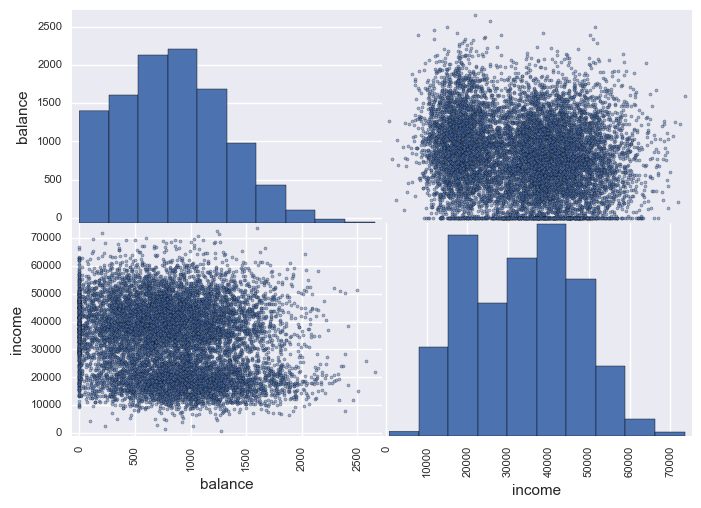

In [98]:
# Chapter 5 Problem 5
# Estimate the test error of this logistic regression model using the 
# validation set approach. Do not forget to set a random seed before 
# beginning your analysis
default = pd.read_csv('./input/Default.csv')
default = default.iloc[:,1:]
default.info()
print(default.head())
print(default.corr())
scatter_matrix(default)
plt.show()

Percent of people defaulting maximizes at 1.0 at a balance of 2392


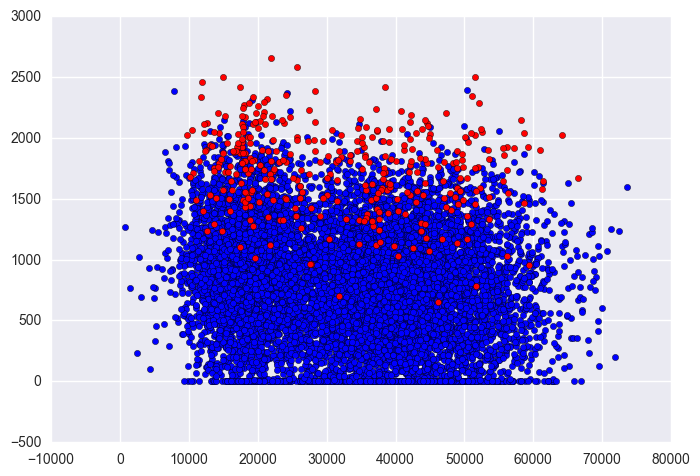

Percent of Students defaulting maximizes at 1.0 at a balance of 2389


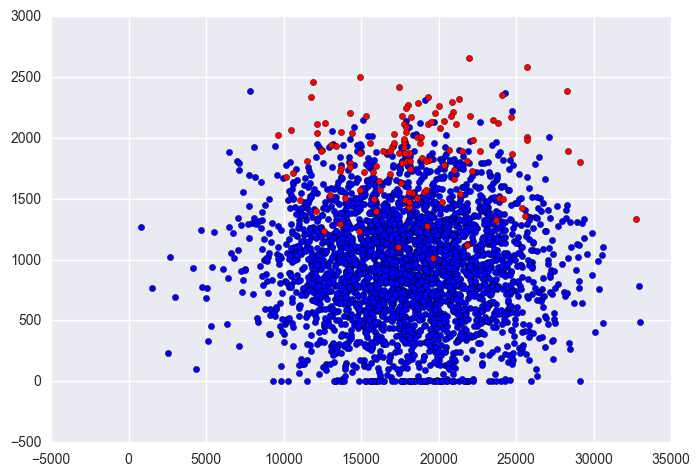

In [102]:
# Digging through the data to get some insight
default_Yes = default.loc[default['default'] == 'Yes']
default_No = default.loc[default['default'] == 'No']
plt.scatter(default_No['income'], default_No['balance'], c='b')
plt.scatter(default_Yes['income'], default_Yes['balance'], c='r')
maxVal = -1
minBal = 0
for balance in range(1000, 2750):
    count_All = default.loc[(default['balance'] > balance)]
    count_default = default.loc[(default['default'] == 'Yes')&(default['balance'] > balance)]
    if(len(count_All) == 0):
        continue
    if len(count_default)/float(len(count_All)) > maxVal:
        maxVal = len(count_default)/float(len(count_All))
        minBal = balance
print("Percent of people defaulting maximizes at %s at a balance of %s" %(maxVal, minBal))
plt.show()

default_Student = default.loc[default['student'] == 'Yes']
default_Yes = default_Student.loc[default_Student['default'] == 'Yes']
default_No = default_Student.loc[default_Student['default'] == 'No']
plt.scatter(default_No['income'], default_No['balance'], c='b')
plt.scatter(default_Yes['income'], default_Yes['balance'], c='r')

maxVal = -1
minBal = 0
for balance in range(1000, 2750):
    count_All = default_Student.loc[(default_Student['balance'] > balance)]
    count_default = default_Student.loc[(default_Student['default'] == 'Yes')&(default_Student['balance'] > balance)]
    if(len(count_All) == 0):
        continue
    if len(count_default)/float(len(count_All)) > maxVal:
        maxVal = len(count_default)/float(len(count_All))
        minBal = balance
print("Percent of Students defaulting maximizes at %s at a balance of %s" %(maxVal, minBal))
plt.show()

In [100]:
# A) Fit a logistic regression model that uses
# income and balance to predict default.
model_LR1 = skl_lm.LogisticRegression()
model_LR1 = model_LR.fit(default.iloc[:,2:], default.iloc[:,0])


In [107]:
# B) Using the validation set approach, estimate the test error of this
# model. In order to do this, you must perform the following steps:

# predictors are in the 1-n columns, result is in column 0
def classify(data, trainingFraction):
    trainingBound = int(len(data)*trainingFraction)
    print("----------START----------")
    print("%s values in training set." %(trainingBound))
    data = data.sample(frac=1)
    # i. Split the sample set into a training set and a validation set.
    X_td = data.iloc[:trainingBound,1:]
    X_vd = data.iloc[trainingBound:,1:]
    y_td = data.iloc[:trainingBound,0]
    y_vd = data.iloc[trainingBound:,0]

    # ii. Fit a multiple logistic regression model using only the training
    # observations.
    model_LR = skl_lm.LogisticRegression()
    model_LR = model_LR.fit(X_td, y_td)
    
    # iii. Obtain a prediction of default status for each individual in the 
    # validation set by computing the posterior probability of default for 
    # that individual, and classifying the individual to the default category 
    # if the posterior probability is greater than 0.5.
    predictions = model_LR.predict(X_vd)
          
    # iv. Compute the validation set error, which is the fraction of the 
    # observations in the validation set that are misclassified.
    vse = model_LR.score(X_vd, y_vd)
    return(vse)

data = default.drop('student',1 )
vse = classify(data, .90)
print("Validation Set Error: %s" %(vse))
    

----------START----------
9000 values in training set.
Validation Set Error: 0.968


In [110]:
# C) Repeat the process in (b) three times, using three different 
# splits of the observations into a training set and a validation set. 
# Comment on the results obtained.
data = default.drop('student',1 )
total1 = sum(classify(data,0.1) for i in range(10))
total2 = sum(classify(data,0.5) for i in range(10))
total3 = sum(classify(data,0.9) for i in range(10))
print("\n***AVERAGE*** \n Validation Set Error: %s\n*************" %(total1/10.))
print("\n***AVERAGE*** \n Validation Set Error: %s\n*************" %(total2/10.))
print("\n***AVERAGE*** \n Validation Set Error: %s\n*************" %(total3/10.))

----------START----------
1000 values in training set.
----------START----------
1000 values in training set.
----------START----------
1000 values in training set.
----------START----------
1000 values in training set.
----------START----------
1000 values in training set.
----------START----------
1000 values in training set.
----------START----------
1000 values in training set.
----------START----------
1000 values in training set.
----------START----------
1000 values in training set.
----------START----------
1000 values in training set.
----------START----------
5000 values in training set.
----------START----------
5000 values in training set.
----------START----------
5000 values in training set.
----------START----------
5000 values in training set.
----------START----------
5000 values in training set.
----------START----------
5000 values in training set.
----------START----------
5000 values in training set.
----------START----------
5000 values in training set.
----------

In [109]:
# D) Now consider a logistic regression model that predicts the 
# probability of default using income, balance, and a dummy variable 
# for student. Estimate the test error for this model using the 
# validation set approach. Comment on whether or not including a 
# dummy variable for student leads to a reduction in the test error rate.
data = default.drop('student',1)
data['student_dummy'] = default.student == 'Yes'
total1 = sum(classify(data,0.1) for i in range(10))
total2 = sum(classify(data,0.5) for i in range(10))
total3 = sum(classify(data,0.9) for i in range(10))
print("\n***AVERAGE*** \n Validation Set Error: %s\n*************" %(total1/10.))
print("\n***AVERAGE*** \n Validation Set Error: %s\n*************" %(total2/10.))
print("\n***AVERAGE*** \n Validation Set Error: %s\n*************" %(total3/10.))

----------START----------
1000 values in training set.
----------START----------
1000 values in training set.
----------START----------
1000 values in training set.
----------START----------
1000 values in training set.
----------START----------
1000 values in training set.
----------START----------
1000 values in training set.
----------START----------
1000 values in training set.
----------START----------
1000 values in training set.
----------START----------
1000 values in training set.
----------START----------
1000 values in training set.
----------START----------
5000 values in training set.
----------START----------
5000 values in training set.
----------START----------
5000 values in training set.
----------START----------
5000 values in training set.
----------START----------
5000 values in training set.
----------START----------
5000 values in training set.
----------START----------
5000 values in training set.
----------START----------
5000 values in training set.
----------

In [111]:
# Problem 9
# In this problem we will use synthetic data sets to explore the 
# bias-variance tradeoff incurred by using regularization.
def syntheticData():
    n = 51
    p = 50
    b = [1]*p
    X = np.random.normal(0,1, size=(n,p))
    noise = np.random.normal(0,.25,n)
    y = X.dot(b) + noise
    return(X,y)

In [126]:
# A) Estimate the mean and variance of βhat, for only a single component. 
# we will choose to do the mean and var for b0
num = 1000
b_hat = np.array([None] * num)
for i in range(num):
    X,y = syntheticData()
    model_LSR = skl_lm.LinearRegression()
    model_LSR = model_LSR.fit(X,y)
    b_hat[i] = model_LSR.coef_[0]
print("Mean:\t%s" %(b_hat.mean()))
print("Var:\t%s" %(b_hat.var()))
# This result still varies significantly. That makes sens though...To an extent


Mean:	0.84546563784
Var:	56.4730762216


In [128]:
# B) Choose regularization coefficients λ = 0.01,0.1,1,10,100 and repeat the above experiment.
alphas = [0.01, 0.1, 1, 10, 100]
num = 1000
for alpha in alphas:
    b_hat = np.array([None] * num)
    for i in range(num):
        X,y = syntheticData()
        model_RR = skl_lm.Ridge(alpha)
        model_RR = model_RR.fit(X,y)
        b_hat[i] = model_RR.coef_[0]
    print("Lambda = %s" %(alpha))
    print("Mean:\t%s" %(b_hat.mean()))
    print("Var:\t%s" %(b_hat.var()))
    print("---------------------------")

Lambda = 0.01
Mean:	0.988219937163
Var:	0.0573371070254
---------------------------
Lambda = 0.1
Mean:	0.951260287463
Var:	0.037924962966
---------------------------
Lambda = 1
Mean:	0.863294669214
Var:	0.0643994094521
---------------------------
Lambda = 10
Mean:	0.637883708833
Var:	0.0975263687285
---------------------------
Lambda = 100
Mean:	0.274689907047
Var:	0.0431725154921
---------------------------


In [4]:
# Problem 8: Chapter 6 Problem 11
boston = pd.read_csv('input/Boston.csv')
boston.info()
boston.head()
print boston.corr()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
Unnamed: 0    506 non-null int64
crim          506 non-null float64
zn            506 non-null float64
indus         506 non-null float64
chas          506 non-null int64
nox           506 non-null float64
rm            506 non-null float64
age           506 non-null float64
dis           506 non-null float64
rad           506 non-null int64
tax           506 non-null int64
ptratio       506 non-null float64
black         506 non-null float64
lstat         506 non-null float64
medv          506 non-null float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB
            Unnamed: 0      crim        zn     indus      chas       nox  \
Unnamed: 0    1.000000  0.407407 -0.103393  0.399439 -0.003759  0.398736   
crim          0.407407  1.000000 -0.200469  0.406583 -0.055892  0.420972   
zn           -0.103393 -0.200469  1.000000 -0.533828 -0.042697 -0.516604   
indus         0.399439

In [194]:
# A) Try out some of the regression methods explored in this chapter, 
# such as best subset selection, the lasso, ridge regression, and PCR. 
# Present and discuss results for the approaches that you consider.
# Subset Selection
alphas = [0.001,0.01,0.1,1,10,100]
# Lasso
for alpha in alphas:
    model_L = skl_lm.LassoCV(alpha)
    model_L = model_L.fit(boston.iloc[:,2:], boston.iloc[:,1])
    score = model_L.score(boston.iloc[:,2:], boston.iloc[:,1])
    print "Alpha: %s\tScore: %s" %(alpha, score)
# Ridge
for alpha in alphas:
    model_RR = skl_lm.Ridge(alpha)
    model_RR =model_RR.fit(boston.iloc[:,2:], boston.iloc[:,1])
    score = model_RR.score(boston.iloc[:,2:], boston.iloc[:,1])
    print "Alpha: %s\tScore: %s" %(alpha, score)
# PCR

Alpha: 0.001	Score: 0.435882994977
Alpha: 0.01	Score: 0.361727044632
Alpha: 0.1	Score: 0.341185551831
Alpha: 1	Score: 5.55111512313e-16
Alpha: 10	Score: 0.0
Alpha: 100	Score: 0.0
Alpha: 0.001	Score: 0.454010387891
Alpha: 0.01	Score: 0.4540102008
Alpha: 0.1	Score: 0.453993569248
Alpha: 1	Score: 0.453324485352
Alpha: 10	Score: 0.450747387218
Alpha: 100	Score: 0.449126548992


In [229]:
# B) Propose a model (or set of models) that seem to perform well on this 
# data set, and justify your answer. Make sure that you are evaluating 
# model performance using validation set error, cross- validation, or some
# other reasonable alternative, as opposed to using training error.
trainingFraction = 0.9

trainingBound = int(round(len(boston) * trainingFraction))
for i in range(2,15):
    for j in range(i+1,15):
        X_td = boston.iloc[:trainingBound,i:j]
        X_vd = boston.iloc[trainingBound:,i:j]
        y_td = boston.iloc[:trainingBound,1]
        y_vd = boston.iloc[trainingBound:,1]

        model_L = skl_lm.Ridge(.01)
        model_L = model_L.fit(X_td, y_td)
        print model_L.score(X_vd, y_vd)

-0.00365417925147
-0.775203097887
-0.918368096289
-0.493276548995
-0.469556143024
-0.425627195942
-0.465056415846
-1.84634901722
-1.88854157478
-1.94981195309
-1.63893474651
-1.50050435722
-0.7475873432
-0.891115889928
-0.48338157124
-0.462792678867
-0.431418874192
-0.458242958397
-2.00523683925
-2.07100168453
-2.11928776645
-1.80052652352
-1.63198580639
-0.0182418209453
-0.161906024341
-0.187643994354
-0.152570505523
-0.244326218625
-1.93410245843
-2.04867240208
-2.0536686449
-1.77721693199
-1.64986263164
-0.102742461289
-0.138351425952
-0.105253587145
-0.185587765478
-1.84029602227
-1.97948383626
-1.98337677305
-1.70819246445
-1.59273468086
-0.118505817139
-0.1048768295
-0.238058920036
-1.77615428337
-1.84451732992
-1.82792126727
-1.58830463719
-1.44864178985
-0.0739506960536
-0.143999301594
-1.82775289435
-1.92648861107
-1.92630075354
-1.67363518293
-1.448233019
-0.191557860933
-1.84807690081
-1.93674024622
-1.93672214174
-1.68386451339
-1.37752898565
-2.02770431526
-2.09557253488
-

In [140]:
# C) Does your chosen model involve all of the features in the data set? 
# Why or why not?

None
